# DAR($p$) and DARMA($p$,$1$)-X Example

## The Model

The Double AutoRegressive model of order $p$ - also known as the DAR($p$) model - from "Ling, S. (2007). A double ar(p) model: Structure and estimation. Statistica Sinica 17(1), 161–175.", can be formulated as follows,

\begin{align*}
y_t = \sum_{i=1}^p \rho_i y_{t-i} + \varepsilon_t, \\
\varepsilon_t = \sigma_t z_t, \quad \quad
\sigma_t = \sqrt{\omega + \sum_{i=1}^p \alpha_i y_{t-i}^2}, \notag
\end{align*}

where the parameter space is given by $\rho_i \in \mathbb{R}$, and $\omega, \alpha_i \geq 0$. The standardized errors follow some distribution with mean zero and unit variance $z_t \sim \text{i.i.d.}(0,1)$. The conditional mean and variance of the DAR($p$) model is given as,
\begin{align*}
\mathbb{E}[y_t|\mathcal{F}_{t-1}] =  \sum_{i=1}^p \rho_i y_{t-i}, \quad \quad
\mathbb{V}[y_t|\mathcal{F}_{t-1}] = \sigma^2_t = \omega + \sum_{i=1}^p \alpha_i y_{t-i}^2,
\end{align*}

## Estimation

The $\text{DAR}$ package supports Maximumun Likelihood Estimation (MLE) with Gaussian and Student-t errors. 

The Student-t distribution is scaled by $\sqrt{\frac{\nu-2}{\nu}}$ to ensure that standardised errors have mean zero and unit variance. The Gaussian and Student-t loglikelihood functions (ignoring constants) respectively are given as,

\begin{align*}
\log \mathcal{L}_T(\theta; \mathcal{F}_{t-1}) &= \sum_{t=p}^{T}
    \Bigg[
        -\frac{1}{2} \log\left(\mathbb{V}[y_t|\mathcal{F}_{t-1}]\right) - \frac{1}{2} \frac{\left(y_t - \mathbb{E}[y_t|\mathcal{F}_{t-1}]\right)^2}{\mathbb{V}[y_t|\mathcal{F}_{t-1}]}

    \Bigg]


\end{align*}



\begin{align*}
\log \mathcal{L}_T(\theta, \nu; \mathcal{F}_{t-1}) &= \sum_{t=p}^{T}
    \Bigg[
        -\frac{1}{2} \log\left(\mathbb{V}[y_t|\mathcal{F}_{t-1}]\right) + \log\left(\Gamma\left(\frac{\nu+1}{2}\right)\right) \\
        &\quad - \log\left(\Gamma\left(\frac{\nu}{2}\right)\right)
        - \frac{\nu+1}{2} \log\left(1 + \frac{\left(y_t - \mathbb{E}[y_t|\mathcal{F}_{t-1}]\right)^2}{\mathbb{V}[y_t|\mathcal{F}_{t-1}](\nu-2)}\right)
    \Bigg]
\end{align*}

## Stationarity

The DAR($p$) model has the advantageous property of volatility-induced stationarity, which allows us to estimate the model in levels and retain more information about the time series compared to ARIMA-type models that rely on first-differencing to handle unit roots.

However, the conditions for strict and weak stationarity of the DAR($p$) model are somewhat involved for general lag-order $p$. First, the model needs to be reformulated on Stochastic Reccurrence Representaiton (SRE) form to obtian the companion matrix $A_{t}$,

\begin{align*}
    A_t = \begin{pmatrix}
    \rho_1 + \sqrt{\alpha_1} z_{1,t} & \dots & \rho_p + \sqrt{\alpha_p} z_{p,t} \\
    \boldsymbol{I}_{(p-1)} & & \boldsymbol{O}_{(p-1) \times 1} \\
    \end{pmatrix}
\end{align*}

where $\boldsymbol{I}$ is the $(p-1)$-order identity matrix and $\boldsymbol{O}$ is a $(p-1) \times 1$ matrix of zeros. Let $\chi(A) = \underset{{i=1,\dots,p}}{\text{max}} \{| \lambda_{A,i} | \}$ denote the spectral radius of matrix $A$, and let $\tau$ denote the top Lyapunov exponent of matrix $A$, which can be approximated as,
\begin{equation}
\tau = \inf_{t \geq 1} \frac{1}{t} \mathbb{E} \left[ \log \left( \| \prod_{i=1}^t A_i \| \right) \right] = \lim_{t \to \infty} \frac{1}{t} \log \left( \| A^t \| \right)
\end{equation}

Then we can state the stationarity conditions as follows:
- Strict stationarity: If $\tau < 0$, then fractional moments exist, i.e. $\mathbb{E}[|y_t|^m] < \infty$ for some  $ m >0$
- Weak stationaity: If $\chi(\mathbb{E}[A_t \otimes A_t]) < 1$, then second-order moments exist, i.e. $\mathbb{E}[|y_t|^2] < \infty$

where $\otimes$ denotes the Kronecker product. 

# Forecasting 

The 1-step ahead point forecast of the mean or forecasted confidence interval around the mean can also be computed using the conditional mean and variance,

 \begin{align*}
 \mathbb{E}[y_{t+1}|\mathcal{F}_{t}] =  \sum_{i=1}^p \rho_i y_{t}
\end{align*}


\begin{align*}
    \text{CI}_{t+1}(\alpha) = \mathbb{E}[y_{t+1} | \mathcal{F}_t] \pm Z(\alpha) \cdot \sqrt{\mathbb{V}[y_{t+1} | \mathcal{F}_t]},
\end{align*}

where $Z(\alpha) = \Phi^{-1}(1-\alpha/2)$ denotes the Z-score for a given distribution as function of the signifiance level $\alpha$.


## Example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
sys.path.append(os.path.abspath(".."))

from models import DAR

To demonstrate volatility-induced stationarity feature of the DAR($p$) model, we will look at corporate bond yields, which seem to follow a unit-root process.

In [2]:
# dataset is crudely assembled only for the purpose of demonstrating the model
cyields_df = pd.read_csv("../data/DAAA.csv") # Corporate Bond Yields : https://fred.stlouisfed.org/series/DAAA
tyields_df = pd.read_csv("../data/DGS2.csv") # Treasury Yields : https://fred.stlouisfed.org/series/DGS2
vix_df = pd.read_csv("../data/VIXCLS.csv") # VIX : https://fred.stlouisfed.org/series/VIXCLS

data_df = cyields_df.merge(tyields_df, on="observation_date", how="left").merge(vix_df, on="observation_date", how="left").dropna()
X = np.array(data_df[["DGS2", "VIXCLS"]])
y = np.array(data_df["DAAA"]).reshape(-1,1)
y_train = y[:800]
y_test = y[800:]

We start by initialising the models with Student-t and Gaussian errors for some lag $p$. Note, that the defualt is Gaussian errors, unless otherwise stated. 

In [20]:
p = 3
dar3_student = DAR(p, dist = "student-t")
dar3_gauss = DAR(p)
print(dar3_student)
print(dar3_gauss)

DAR(3) model assuming student-t errors
DAR(3) model assuming gaussian errors


After estimating the models using the ".fit()" attribute, we can access the parameter estimates in a dictionary. The parameter "nu" is the degrees of freedom in the student-t distribution. Interestingly, we see that it is very high, which indicates that corporate bonds are Gaussian distributed. 

In [21]:
dar3_student.fit(y_train)
dar3_gauss.fit(y_train)
print(dar3_student.params)
print(dar3_gauss.params)

{'omega': array([0.00101521]), 'alpha': array([0.00100022, 0.00116141, 0.00130063]), 'rho': array([ 1.03024867, -0.0420384 ,  0.01256014]), 'nu': array([9759.81681974])}
{'omega': array([0.00100013]), 'alpha': array([0.00101812, 0.00100358, 0.00100112]), 'rho': array([ 1.33990529, -0.43554526,  0.09624002])}


We can now determine the whether or not our models are stationary using numerical methods. The results are easily accessed using the ".statio()" attribute. We see that both models are strictly stationary, but not weakly stationary, which renders the variance of the models undefined.

In [22]:
print(dar3_student.statio())
print(dar3_gauss.statio())

{'strictly': {'stationary': True, 'top Lyapunov exponent': -0.0013189673088667446}, 'weakly': {'stationary': False, 'spectral radius of the expected Kronecker product of the companion matrix': 1.0051040676708964}}
{'strictly': {'stationary': True, 'top Lyapunov exponent': -0.0017613161138924699}, 'weakly': {'stationary': False, 'spectral radius of the expected Kronecker product of the companion matrix': 1.006435180933342}}


After estimating the model on "y_train", we can compute the 1-step ahead out-of-sample forecasts on the "y_test".

In [23]:
predict_CI = dar3_gauss.predict_CI(y_test)
predict_mean = dar3_gauss.predict(y_test)

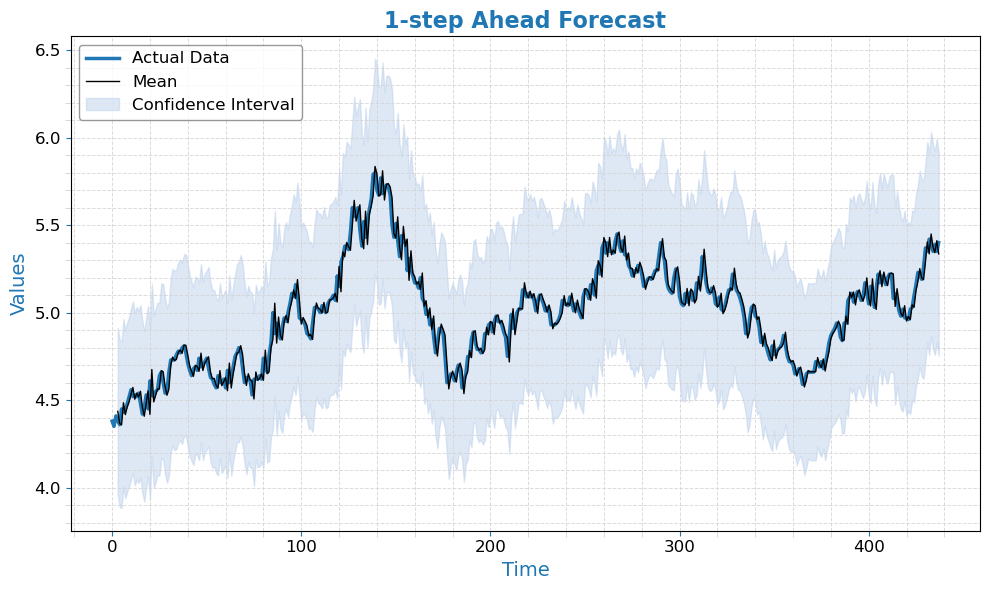

In [24]:
time = np.arange(len(y_test))
lower_bound, upper_bound = predict_CI[:-1, 0], predict_CI[:-1, 1]

# Define colors
actual_color = '#1f77b4' 
ci_fill_color = '#aec7e8'
grid_color = '#d3d3d3'

# Create the time series plot
plt.figure(figsize=(10, 6)) 

# Plot the actual data
plt.plot(time, y_test, label='Actual Data', linestyle='-', linewidth=2.5, color=actual_color)

# Plot the forecasted mean
plt.plot(time, predict_mean[:-1], label='Mean', linestyle='-', linewidth=1., color="black")

# Plot the confidence interval
plt.fill_between(time, lower_bound, upper_bound, color=ci_fill_color, alpha=0.4, label='Confidence Interval')

# Add labels, title, and legend
plt.title('1-step Ahead Forecast', fontsize=16, fontweight='bold', color=actual_color)
plt.xlabel('Time', fontsize=14, color=actual_color)
plt.ylabel('Values', fontsize=14, color=actual_color)


plt.legend(fontsize=12, loc='upper left', frameon=True, edgecolor='grey')
plt.grid(True, which='both', linestyle='--', linewidth=0.7, color=grid_color, alpha=0.8)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=12, color=actual_color)
plt.tick_params(axis='both', which='minor', color=grid_color, length=4)
plt.tight_layout()
plt.show()